In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("data_v1.xlsx") 

# Expolatory Data Analysis

In [3]:
df.head(10)

,STUDENT_NUMBER,COURSE_DESCRIPTION,INTAKE_CODE,MODULE_CODE,MODULE_NAME,GRADE,STUDY_MODE
0,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,AQ049-3-M-MMDA,Multivariate Methods for Data Analysis,B+,Part time
1,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,AQ050-3-M-TSAF,Time Series Analysis and Forecasting,C-,Part time
2,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,AQ051-3-M-MDA,Multilevel Data Analysis,A,Part time
3,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,AQ052-3-M-ORO,Operational Research and Optimisation,NaN,Part time
4,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,BM026-3-M-SEM,Strategies in Emerging Markets,NaN,Part time
5,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,BM031-3-M-BSSMMA,"Behavioural Science, Social Media and Marketin...",A,Part time
6,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,CE049-6-M-CPROJ,Capstone Project,NaN,Part time
7,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,CT045-3-M-ABAV,Advanced Business Analytics and Visualization,B+,Part time
8,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,CT046-3-M-AML,Applied Machine Learning,C-,Part time
9,ABC0001,MSc in Data Science and Business Analytics,UCMP1709DSBA,CT047-3-M-BDAT,Big Data Analytics and Technologies,C+,Part time


In [4]:
df.shape

(6618, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6618 entries, 0 to 6617
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   STUDENT_NUMBER      6618 non-null   object
 1   COURSE_DESCRIPTION  6618 non-null   object
 2   INTAKE_CODE         6618 non-null   object
 3   MODULE_CODE         6618 non-null   object
 4   MODULE_NAME         6618 non-null   object
 5   GRADE               3402 non-null   object
 6   STUDY_MODE          6618 non-null   object
dtypes: object(7)
memory usage: 362.1+ KB


In [6]:
df.dtypes

STUDENT_NUMBER        object
COURSE_DESCRIPTION    object
INTAKE_CODE           object
MODULE_CODE           object
MODULE_NAME           object
GRADE                 object
STUDY_MODE            object
dtype: object

In [7]:
# Check for NaN values in each column
nan_values = df.isna().sum()
print(nan_values)

STUDENT_NUMBER           0
COURSE_DESCRIPTION       0
INTAKE_CODE              0
MODULE_CODE              0
MODULE_NAME              0
GRADE                 3216
STUDY_MODE               0
dtype: int64


In [8]:
df['STUDY_MODE'].value_counts()

STUDY_MODE
Part time            5232
Distance Learning    1386
Name: count, dtype: int64

In [9]:
# check the columns in data
df.columns

Index(['STUDENT_NUMBER', 'COURSE_DESCRIPTION', 'INTAKE_CODE', 'MODULE_CODE',
       'MODULE_NAME', 'GRADE', 'STUDY_MODE'],
      dtype='object')

In [10]:
df.describe()

,STUDENT_NUMBER,COURSE_DESCRIPTION,INTAKE_CODE,MODULE_CODE,MODULE_NAME,GRADE,STUDY_MODE
count,6618,6618,6618,6618,6618,3402,6618
unique,320,2,165,117,75,16,2
top,ABC0250,MSc in Data Science and Business Analytics,APUMP2203DSBA(DE)(PR)-ODL,PHD_MASTERS,Multivariate Methods for Data Analysis,Pass,Part time
freq,36,6269,245,295,367,725,5232


In [11]:
# Display the first 10 rows of the 'GRADE' column
print(df['GRADE'].head(30))

0       B+
1       C-
2        A
3      NaN
4      NaN
5        A
6      NaN
7       B+
8       C-
9       C+
10      B+
11       A
12      B+
13     NaN
14     NaN
15     NaN
16       A
17     NaN
18       A
19      C-
20      C-
21     NaN
22    Pass
23     NaN
24       A
25       B
26       B
27       A
28      C+
29      B+
Name: GRADE, dtype: object


In [12]:
# check for some null or missing values in our dataset
df.isna().sum()

STUDENT_NUMBER           0
COURSE_DESCRIPTION       0
INTAKE_CODE              0
MODULE_CODE              0
MODULE_NAME              0
GRADE                 3216
STUDY_MODE               0
dtype: int64

In [13]:
# Get the most frequent grade (mode) in the 'GRADE' column
mode_grade = df['GRADE'].mode()[0]  # This will return the most frequent grade

# Fill the missing values in the 'GRADE' column with the mode
df['GRADE'].fillna(mode_grade, inplace=True)

# Verify the changes
print(df.isna().sum())  # Ensure there are no missing values
print(df['GRADE'].value_counts())  # Check the distribution of grades after filling missing values

STUDENT_NUMBER        0
COURSE_DESCRIPTION    0
INTAKE_CODE           0
MODULE_CODE           0
MODULE_NAME           0
GRADE                 0
STUDY_MODE            0
dtype: int64
GRADE
Pass    3941
B+       648
A        601
A+       430
B        391
C+       195
C-       155
C        129
U         67
D         14
Fail      13
F+        11
F-         9
M          7
F          6
P          1
Name: count, dtype: int64


In [14]:
# Define the grades to remove
grades_to_remove = ['F+', 'F-','F', 'P']

# Filter the DataFrame to exclude these grades
df_filtered = df[~df['GRADE'].isin(grades_to_remove)]

# Verify the changes
print(df_filtered['GRADE'].value_counts())  # Check the distribution of grades after filtering


GRADE
Pass    3941
B+       648
A        601
A+       430
B        391
C+       195
C-       155
C        129
U         67
D         14
Fail      13
M          7
Name: count, dtype: int64


In [15]:
# checking the duplicate roes in the data
duplicate_rows= df[df.duplicated()]

# print the duplicate rows
print("numbers of duplicates rows:" , duplicate_rows.shape)

numbers of duplicates rows: (0, 7)


In [16]:
# 2. Check Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
STUDENT_NUMBER        0
COURSE_DESCRIPTION    0
INTAKE_CODE           0
MODULE_CODE           0
MODULE_NAME           0
GRADE                 0
STUDY_MODE            0
dtype: int64


In [17]:
# 3. Unique Modules and Students
print("\nNumber of Unique Modules:", df['MODULE_CODE'].nunique())
print("Number of Unique Students:", df['STUDENT_NUMBER'].nunique())


Number of Unique Modules: 117
Number of Unique Students: 320


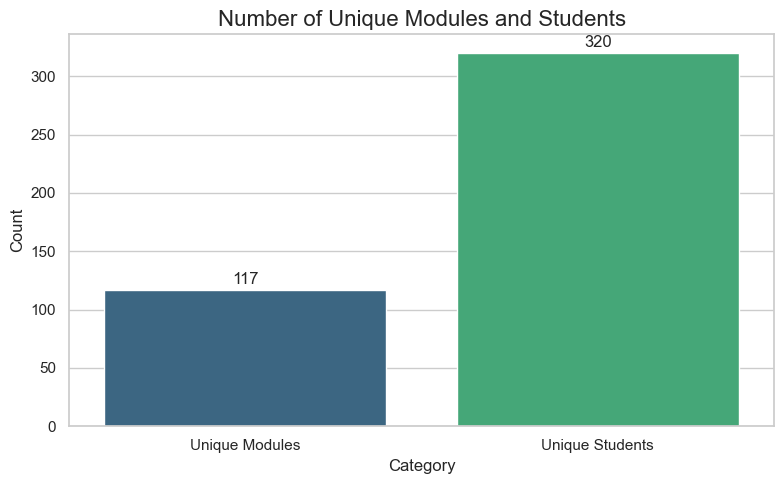

Bar chart saved as unique_modules_and_students.png


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
categories = ['Unique Modules', 'Unique Students']
values = [117, 320]

# Set the style of the plot
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=values, palette='viridis')

# Add titles and labels
plt.title('Number of Unique Modules and Students', fontsize=16)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Category', fontsize=12)

# Add values on top of the bars
for i, v in enumerate(values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=12)

# Save the plot as an image
output_path = 'unique_modules_and_students.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300)  # High-quality image

# Display the plot
plt.show()

print(f"Bar chart saved as {output_path}")


In [19]:
# 4. Analyze Study Modes
print("\nStudy Mode Distribution:")
print(df['STUDY_MODE'].value_counts())


Study Mode Distribution:
STUDY_MODE
Part time            5232
Distance Learning    1386
Name: count, dtype: int64


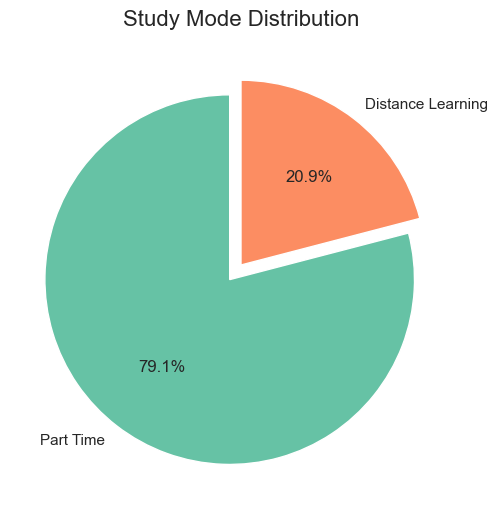

Pie chart saved as study_mode_distribution.png


In [20]:
import matplotlib.pyplot as plt

# Data for visualization
study_mode_labels = ['Part Time', 'Distance Learning']
study_mode_values = [5232, 1386]

# Create the pie chart
plt.figure(figsize=(8, 6))
colors = ['#66c2a5', '#fc8d62']  # Custom colors
explode = (0.1, 0)  # Highlight the first slice

plt.pie(study_mode_values, labels=study_mode_labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Add a title
plt.title('Study Mode Distribution', fontsize=16)

# Save the plot as an image
output_path = 'study_mode_distribution.png'
plt.savefig(output_path, dpi=300)  # High-quality image

# Display the chart
plt.show()

print(f"Pie chart saved as {output_path}")


In [21]:
# 5. Module Enrollment Analysis for Part-Time Students
part_time_df = df[df['STUDY_MODE'] == 'Part time']
print("\nPart-Time Module Enrollment Statistics:")
print(part_time_df['MODULE_CODE'].value_counts().head())


Part-Time Module Enrollment Statistics:
MODULE_CODE
PHD_MASTERS       247
CT047-3-M-BDAT    218
CT051-3-M-DM      212
CT050-3-M-DAP     211
CT046-3-M-AML     205
Name: count, dtype: int64


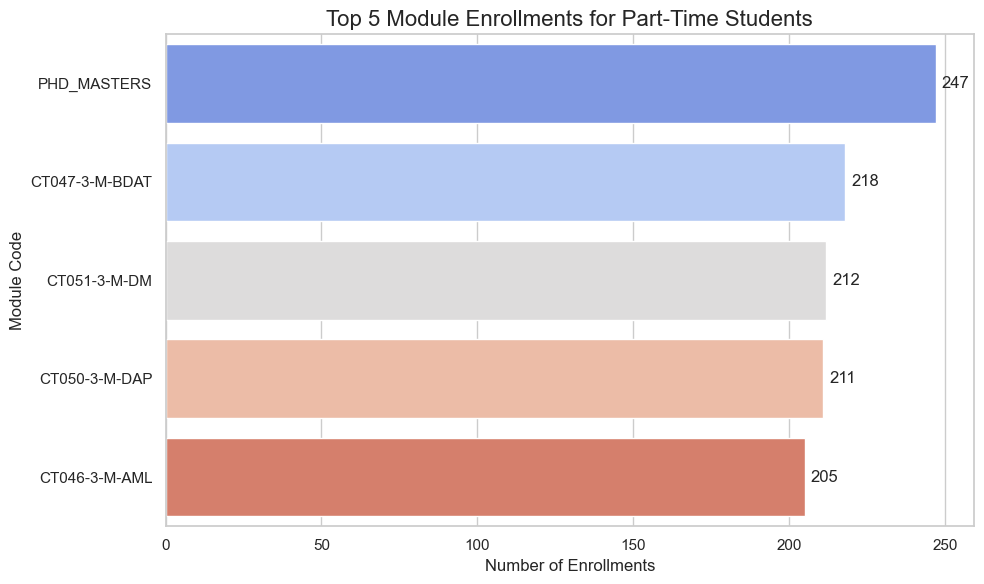

Bar chart saved as part_time_module_enrollment.png


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
module_codes = ['PHD_MASTERS', 'CT047-3-M-BDAT', 'CT051-3-M-DM', 'CT050-3-M-DAP', 'CT046-3-M-AML']
enrollment_counts = [247, 218, 212, 211, 205]

# Set the style
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=enrollment_counts, y=module_codes, palette='coolwarm')

# Add titles and labels
plt.title('Top 5 Module Enrollments for Part-Time Students', fontsize=16)
plt.xlabel('Number of Enrollments', fontsize=12)
plt.ylabel('Module Code', fontsize=12)

# Add values on the bars
for i, v in enumerate(enrollment_counts):
    plt.text(v + 2, i, str(v), va='center', fontsize=12)

# Save the plot as an image
output_path = 'part_time_module_enrollment.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300)  # High-quality image

# Display the chart
plt.show()

print(f"Bar chart saved as {output_path}")


In [23]:
# 6. Intake Analysis
print("\nIntake Analysis for Part-Time Students:")
print(part_time_df['INTAKE_CODE'].value_counts().head())


Intake Analysis for Part-Time Students:
INTAKE_CODE
APUMP2308DSBA(DE)(PR)-ODL    137
UCMP1711DSBA                 125
APUMP1810DSBA                115
UCMP1709DSBA                 111
APUMP1907DSBA                104
Name: count, dtype: int64


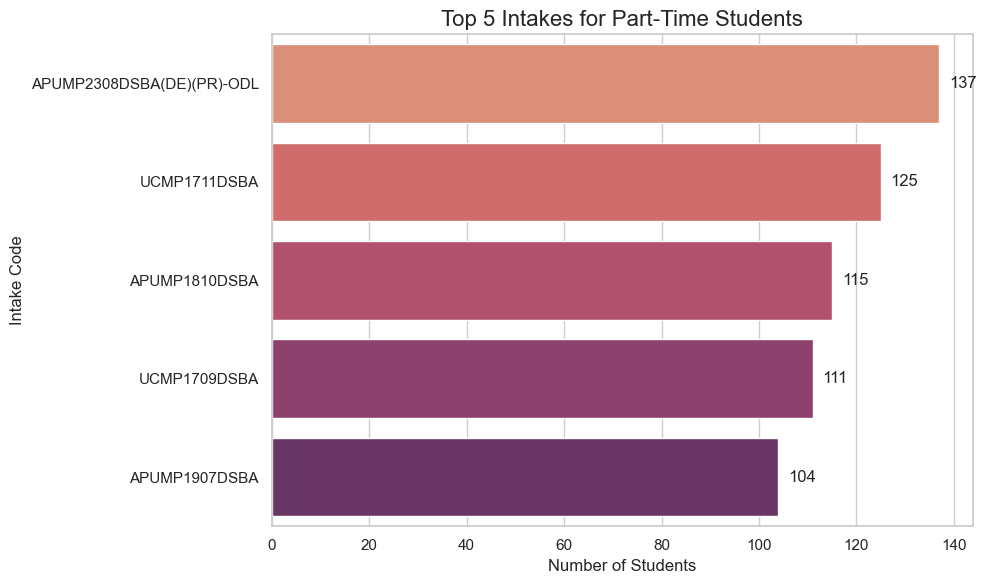

Bar chart saved as intake_analysis_part_time.png


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
intake_codes = [
    'APUMP2308DSBA(DE)(PR)-ODL',
    'UCMP1711DSBA',
    'APUMP1810DSBA',
    'UCMP1709DSBA',
    'APUMP1907DSBA'
]
intake_counts = [137, 125, 115, 111, 104]

# Set the style
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=intake_counts, y=intake_codes, palette='flare')

# Add titles and labels
plt.title('Top 5 Intakes for Part-Time Students', fontsize=16)
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Intake Code', fontsize=12)

# Add values on the bars
for i, v in enumerate(intake_counts):
    plt.text(v + 2, i, str(v), va='center', fontsize=12)

# Save the plot as an image
output_path = 'intake_analysis_part_time.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300)  # High-quality image

# Display the chart
plt.show()

print(f"Bar chart saved as {output_path}")


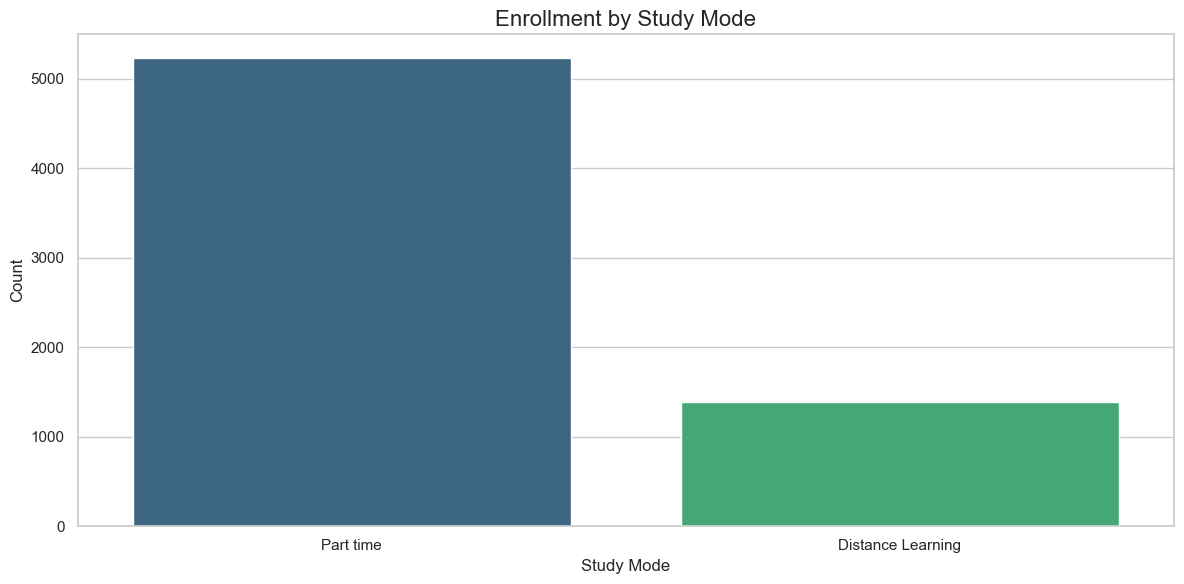

Enrollment trends chart saved as enrollment_by_study_mode.png


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='STUDY_MODE', palette='viridis')

# Add titles and labels
plt.title("Enrollment by Study Mode", fontsize=16)
plt.xlabel("Study Mode", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Save the plot as an image
output_path = 'enrollment_by_study_mode.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300)  # High-quality image

# Display the chart
plt.show()

print(f"Enrollment trends chart saved as {output_path}")

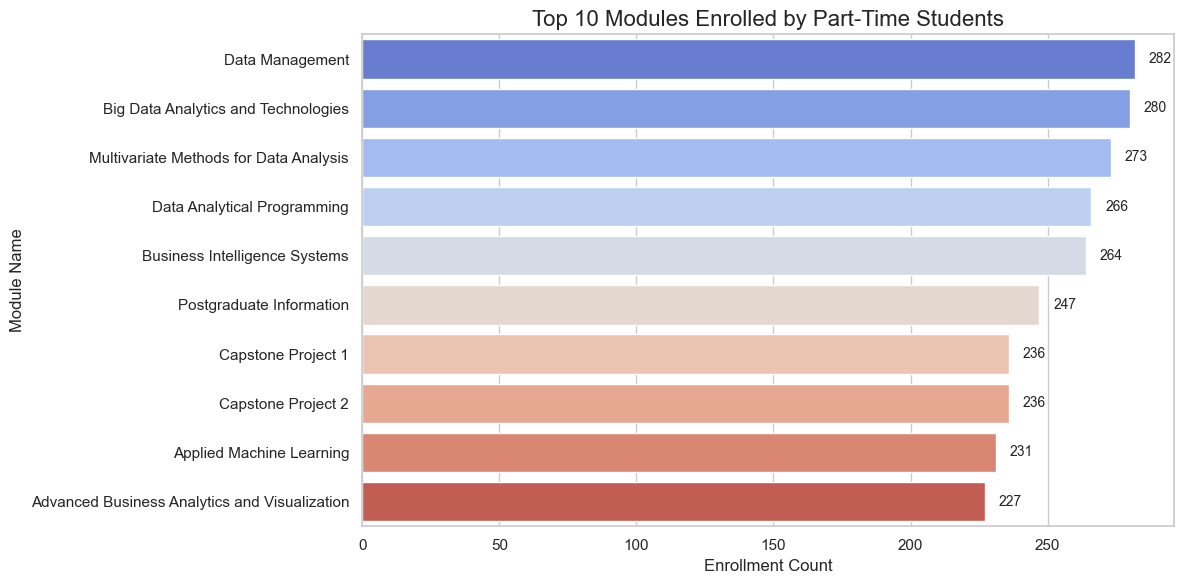

Bar chart for popular modules saved as popular_modules_part_time.png


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data for visualization
popular_modules = part_time_df['MODULE_NAME'].value_counts().head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_modules.values, y=popular_modules.index, palette='coolwarm')

# Add titles and labels
plt.title("Top 10 Modules Enrolled by Part-Time Students", fontsize=16)
plt.xlabel("Enrollment Count", fontsize=12)
plt.ylabel("Module Name", fontsize=12)

# Add values on the bars
for i, v in enumerate(popular_modules.values):
    plt.text(v + 5, i, str(v), va='center', fontsize=10)

# Save the plot as an image
output_path = 'popular_modules_part_time.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300)  # High-quality image

# Display the chart
plt.show()

print(f"Bar chart for popular modules saved as {output_path}")

In [27]:
# 10. Scheduling Constraints Analysis
# Identify modules without grades (incomplete or yet to be scheduled)
incomplete_modules = part_time_df[part_time_df['GRADE'].isnull()]
print("\nIncomplete Modules Statistics (Part-Time):")
print(incomplete_modules['MODULE_NAME'].value_counts().head())


Incomplete Modules Statistics (Part-Time):
Series([], Name: count, dtype: int64)


In [28]:
# Modules most frequently taken by students in the same intake
intake_module_counts = part_time_df.groupby(['INTAKE_CODE', 'MODULE_CODE']).size().reset_index(name='Count')
top_modules_per_intake = intake_module_counts.sort_values(by='Count', ascending=False).head(10)
print("\nTop Modules per Intake:")
print(top_modules_per_intake)


Top Modules per Intake:
       INTAKE_CODE     MODULE_CODE  Count
2504  UCMP1711DSBA   AQ051-3-M-MDA      7
2514  UCMP1711DSBA    CT051-3-M-DM      7
2501  UCMP1711DSBA  AQ049-3-M-MMDA      7
2519  UCMP1711DSBA     PHD_MASTERS      7
2518  UCMP1711DSBA  CT087-3-M-RMCP      7
2517  UCMP1711DSBA   CT086-7-M-CP2      7
2516  UCMP1711DSBA   CT085-5-M-CP1      7
2515  UCMP1711DSBA   CT052-3-M-NLP      7
2513  UCMP1711DSBA   CT050-3-M-DAP      7
2512  UCMP1711DSBA   CT048-3-M-BIS      7


In [29]:
# 11. Recommendations for Scheduling
# Identify the most popular modules that need more frequent scheduling
popular_incomplete_modules = incomplete_modules['MODULE_NAME'].value_counts().head(5)
print("\nMost Popular Incomplete Modules:")
print(popular_incomplete_modules)


Most Popular Incomplete Modules:
Series([], Name: count, dtype: int64)


In [30]:
# 12. Suggested Schedule based on Popular Modules and Intakes
# We can suggest that popular modules with high demand across intakes should have more frequent scheduling slots.

# Export results for further analysis
#output_path = "part_time_scheduling_analysis.csv"
#intake_module_counts.to_csv(output_path, index=False)
#print(f"\nScheduling analysis exported to {output_path}")

In [31]:
missing_grades_ratio = df['GRADE'].isna().mean()
print(f"Missing grades: {missing_grades_ratio:.2%}")

Missing grades: 0.00%


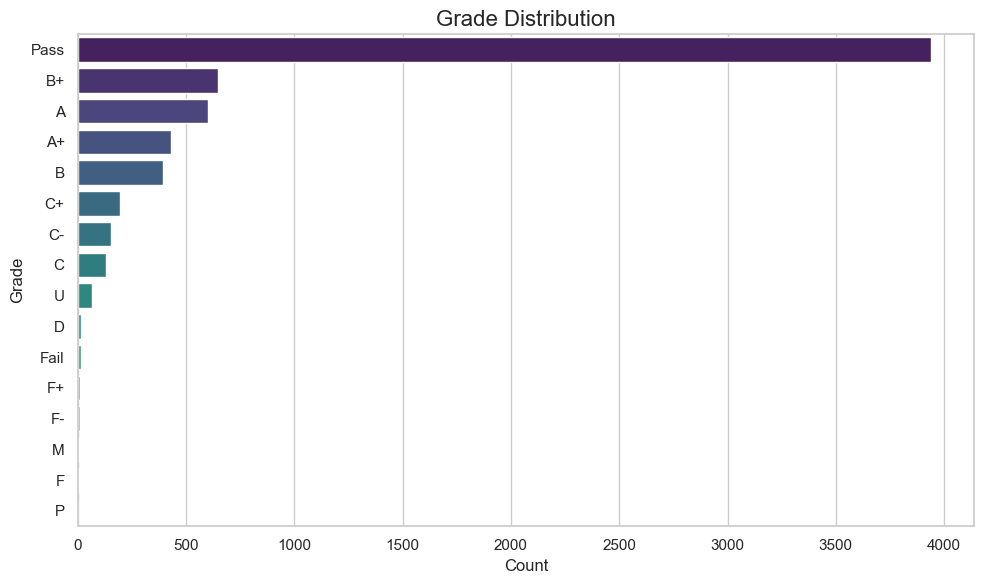

Grade distribution chart saved as grade_distribution_countplot.png


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the count plot for grade distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='GRADE', order=df['GRADE'].value_counts().index, palette='viridis')

# Add titles and labels
plt.title('Grade Distribution', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Grade', fontsize=12)

# Save the plot as an image
output_path = 'grade_distribution_countplot.png'
plt.tight_layout()
plt.savefig(output_path, dpi=300)  # High-quality image

# Display the chart
plt.show()

print(f"Grade distribution chart saved as {output_path}")

# Genetic Algorithm


Running GA for DSBA...
Generation 1 (DSBA): Best = 6272, Avg = 6272.00, Worst = 6272
Generation 2 (DSBA): Best = 6176, Avg = 6259.12, Worst = 6364
Generation 3 (DSBA): Best = 6176, Avg = 6268.44, Worst = 6387
Generation 4 (DSBA): Best = 6193, Avg = 6288.04, Worst = 6426
Generation 5 (DSBA): Best = 6168, Avg = 6288.12, Worst = 6425
Generation 6 (DSBA): Best = 6155, Avg = 6291.84, Worst = 6466
Generation 7 (DSBA): Best = 6170, Avg = 6279.44, Worst = 6415
Generation 8 (DSBA): Best = 6156, Avg = 6290.64, Worst = 6419
Generation 9 (DSBA): Best = 6152, Avg = 6258.16, Worst = 6373
Generation 10 (DSBA): Best = 6168, Avg = 6272.48, Worst = 6386
Generation 11 (DSBA): Best = 6168, Avg = 6272.88, Worst = 6386
Generation 12 (DSBA): Best = 6155, Avg = 6259.44, Worst = 6353
Generation 13 (DSBA): Best = 6158, Avg = 6258.68, Worst = 6338
Generation 14 (DSBA): Best = 6204, Avg = 6262.72, Worst = 6357
Generation 15 (DSBA): Best = 6204, Avg = 6264.24, Worst = 6332
Generation 16 (DSBA): Best = 6208, Avg =

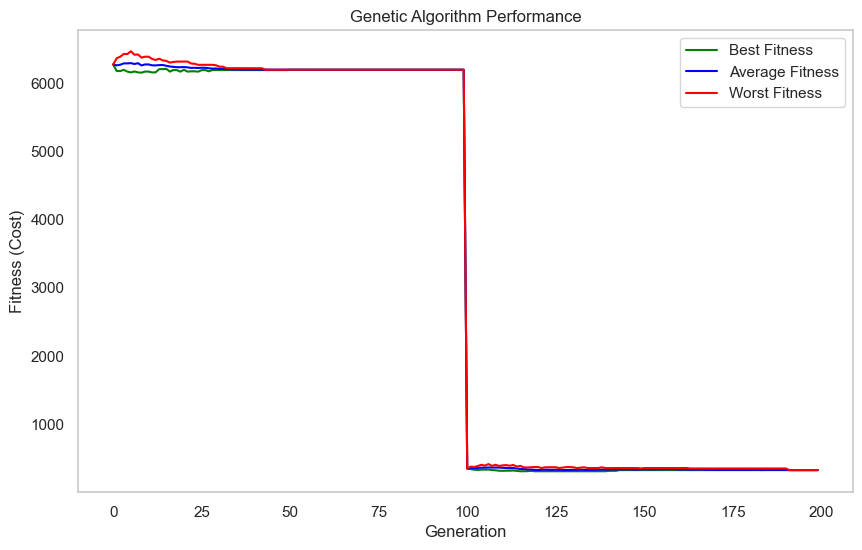

In [38]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns


# Function to check constraints
def check_constraints(schedule, max_semesters=6, department='DSBA'):
    """
    Ensure the schedule satisfies all constraints, including RMCP/RMCE placement for DSBA.
    """
    if department == 'DSBA':
        rmcp_required_semesters = [1, 5]  # RMCP must be offered in semesters 1 and 5
        rmce_required_semesters = [3]    # RMCE must be offered in semester 3

        # Check RMCP placement
        for semester in rmcp_required_semesters:
            if 'RMCP' not in schedule[semester]:
                return False

        # Check RMCE placement
        for semester in rmce_required_semesters:
            if 'RMCE' not in schedule[semester]:
                return False

    # Check total semesters constraint
    if len(schedule) > max_semesters:
        return False

    return True

# Function to calculate cost
def calculate_cost(schedule, department='DSBA'):
    """
    Calculate the cost of a schedule based on resource usage.
    Includes penalties for missing RMCP/RMCE requirements (DSBA only).
    """
    total_cost = 0
    if department == 'DSBA':
        rmcp_rmce_offered = {1: False, 3: False, 5: False}  # Jan, May, Oct
        for semester, modules in schedule.items():
            total_cost += len(modules)  # Basic cost based on number of modules
            for module in modules:
                if module in ['RMCP', 'RMCE'] and semester in rmcp_rmce_offered:
                    rmcp_rmce_offered[semester] = True

        missing_offers = sum(1 for offered in rmcp_rmce_offered.values() if not offered)
        total_cost += missing_offers * 100  # High penalty for missing RMCP/RMCE requirements
    else:
        for semester, modules in schedule.items():
            total_cost += len(modules)  # Cost based on number of modules
    return total_cost

# Genetic Algorithm Class
class ScheduleGA:
    def __init__(self, num_generations, population_size, mutation_rate):
        self.num_generations = num_generations
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.history = {'best': [], 'average': [], 'worst': []}  # Track performance

    def run(self, df, department):
        """
        Main Genetic Algorithm process.
        """
        population = self.initialize_population(df, department)
        for generation in range(self.num_generations):
            fitness_scores = [self.evaluate_schedule(schedule, department) for schedule in population]
            
            # Log performance metrics
            best_score = min(fitness_scores)
            average_score = sum(fitness_scores) / len(fitness_scores)
            worst_score = max(fitness_scores)
            self.history['best'].append(best_score)
            self.history['average'].append(average_score)
            self.history['worst'].append(worst_score)
            
            print(f"Generation {generation + 1} ({department}): Best = {best_score}, Avg = {average_score:.2f}, Worst = {worst_score}")
            
            selected_population = self.selection(population, fitness_scores)
            new_population = self.crossover(selected_population)
            population = self.mutation(new_population)
        return self.get_best_schedule(population, department)

    def initialize_population(self, df, department):
        """
        Initialize a random population of schedules for a department.
        """
        population = []
        for _ in range(self.population_size):
            schedule = {semester: [] for semester in range(1, 7)}
            
            if department == 'DSBA':
                # Ensure RMCP and RMCE are scheduled correctly
                schedule[1].append('RMCP')  # Jan
                schedule[3].append('RMCE')  # May
                schedule[5].append('RMCP')  # Oct

            # Assign other modules randomly to semesters
            for module in df['MODULE_CODE']:
                if module not in ['RMCP', 'RMCE'] or department == 'SE':
                    semester = random.choice(range(1, 7))
                    schedule[semester].append(module)
            population.append(schedule)
        return population

    def evaluate_schedule(self, schedule, department):
        """
        Evaluate the fitness of a schedule. Lower cost is better.
        Assign a high penalty for invalid schedules.
        """
        if not check_constraints(schedule, department=department):
            return 10**6  # Large penalty for invalid schedules
        return calculate_cost(schedule, department=department)

    def selection(self, population, fitness_scores):
        """
        Select individuals based on their fitness scores.
        """
        # Invert fitness scores for selection (lower cost is better)
        inverted_scores = [1 / (score + 1e-6) for score in fitness_scores]  # Add small value to avoid division by zero
        return random.choices(population, weights=inverted_scores, k=self.population_size)

    def crossover(self, selected_population):
        """
        Perform crossover to generate new schedules.
        """
        new_population = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1] if i + 1 < len(selected_population) else selected_population[i]
            child = {}
            for semester in range(1, 7):
                child[semester] = parent1[semester] if random.random() > 0.5 else parent2[semester]
            new_population.append(child)
        return new_population

    def mutation(self, population):
        """
        Mutate the population to introduce diversity.
        """
        for schedule in population:
            if random.random() < self.mutation_rate:
                semester1, semester2 = random.sample(range(1, 7), 2)

                # Ensure RMCP and RMCE are not affected by mutation
                if schedule[semester1] and schedule[semester2]:
                    module1 = random.choice(schedule[semester1])
                    module2 = random.choice(schedule[semester2])

                    # Only swap if neither is RMCP or RMCE
                    if module1 not in ['RMCP', 'RMCE'] and module2 not in ['RMCP', 'RMCE']:
                        schedule[semester1].remove(module1)
                        schedule[semester2].remove(module2)
                        schedule[semester1].append(module2)
                        schedule[semester2].append(module1)
        return population

    def get_best_schedule(self, population, department):
        """
        Get the schedule with the lowest cost for a department.
        """
        return min(population, key=lambda schedule: calculate_cost(schedule, department=department))

    def plot_performance(self):
        """
        Plot the GA performance metrics across generations.
        """
        plt.figure(figsize=(10, 6))
        plt.plot(self.history['best'], label="Best Fitness", color='green')
        plt.plot(self.history['average'], label="Average Fitness", color='blue')
        plt.plot(self.history['worst'], label="Worst Fitness", color='red')
        plt.xlabel("Generation")
        plt.ylabel("Fitness (Cost)")
        plt.title("Genetic Algorithm Performance")
        plt.legend()
        plt.grid()
        plt.show()

# Add a 'DEPARTMENT' column to the dataset
df['DEPARTMENT'] = df['COURSE_DESCRIPTION'].apply(lambda x: 'DSBA' if 'Data Science' in x else 'SE')

# Filter dataset for DSBA and SE
df_dsba = df[df['DEPARTMENT'] == 'DSBA']
df_se = df[df['DEPARTMENT'] == 'SE']

# Run GA for both departments
ga = ScheduleGA(num_generations=100, population_size=50, mutation_rate=0.1)

print("\nRunning GA for DSBA...")
best_schedule_dsba = ga.run(df_dsba, department='DSBA')

print("\nRunning GA for SE...")
best_schedule_se = ga.run(df_se, department='SE')

# Display schedules
print("\nBest Schedule for DSBA:")
for semester, modules in best_schedule_dsba.items():
    print(f"Semester {semester}: {modules}")

print("\nBest Schedule for SE:")
for semester, modules in best_schedule_se.items():
    print(f"Semester {semester}: {modules}")

# Plot performance
ga.plot_performance()


In [39]:
import pandas as pd
import random
from openpyxl import Workbook
from openpyxl.styles import PatternFill, Alignment, Font, Border, Side
from openpyxl.utils import get_column_letter


# Function to create Excel file with course schedule for both departments
def create_excel_schedule_for_both(df, best_schedule_dsba, best_schedule_se, num_students=10):
    """
    Create an Excel file with schedules for MSc DSBA and MSc SE students using GA results.
    """
    wb = Workbook()
    ws = wb.active
    ws.title = 'Course Schedules'

    def write_section(ws, title, schedules, start_row):
        """
        Write a section of schedules for a specific department to the Excel sheet.
        """
        # Add department title
        ws.merge_cells(start_row=start_row, start_column=1, end_row=start_row, end_column=7)
        ws.cell(row=start_row, column=1, value=title).font = Font(bold=True, size=14, color="000000")
        ws.cell(row=start_row, column=1).alignment = Alignment(horizontal="center", vertical="center")

        # Write headers
        headers = ['STUDENT_NUMBER', 'Semester 1', 'Semester 2', 'Semester 3', 'Semester 4', 'Semester 5', 'Semester 6']
        for col_idx, header in enumerate(headers, start=1):
            cell = ws.cell(row=start_row + 1, column=col_idx, value=header)
            cell.fill = PatternFill(start_color="FFFF00", end_color="FFFF00", fill_type="solid")
            cell.font = Font(bold=True, color="000000")
            cell.alignment = Alignment(horizontal="center", vertical="center")

        # Write schedules
        row = start_row + 2
        for i, schedule in enumerate(schedules.itertuples(index=False, name=None)):
            fill_color = "F9F9F9" if i % 2 == 0 else "FFFFFF"
            for col_idx, cell_value in enumerate(schedule, start=1):
                cell = ws.cell(row=row, column=col_idx, value=cell_value)
                cell.fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")
                cell.alignment = Alignment(horizontal="center", vertical="center")
                cell.border = Border(
                    left=Side(border_style='thin'),
                    right=Side(border_style='thin'),
                    top=Side(border_style='thin'),
                    bottom=Side(border_style='thin')
                )
            row += 1

        # Return the next available row
        return row + 2

    # Generate personalized schedules for DSBA and SE using GA results
    def create_personalized_schedule(best_schedule):
        """
        Generate a DataFrame of personalized schedules from the best schedule.
        """
        student_schedules = []
        for student_number in range(1, num_students + 1):
            student_schedule = {'STUDENT_NUMBER': f"ABC{str(student_number).zfill(4)}"}
            for semester in range(1, 7):
                student_schedule[f"Semester {semester}"] = ', '.join(best_schedule.get(semester, []))
            student_schedules.append(student_schedule)
        return pd.DataFrame(student_schedules)

    # Create separate schedules
    personalized_schedules_dsba = create_personalized_schedule(best_schedule_dsba)
    personalized_schedules_se = create_personalized_schedule(best_schedule_se)

    # Write DSBA schedules
    current_row = 1
    current_row = write_section(ws, "MSc DSBA Schedules", personalized_schedules_dsba, current_row)

    # Write SE schedules
    current_row = write_section(ws, "MSc SE Schedules", personalized_schedules_se, current_row)

    # Set column widths
    for col_idx in range(1, 8):
        ws.column_dimensions[get_column_letter(col_idx)].width = 25

    # Save the Excel file
    filename = 'Personalized_Course_Schedule_2025.xlsx'
    wb.save(filename)
    print(f"Excel file '{filename}' has been created with schedules for both departments.")

# Example: Generate schedules for DSBA and SE using the best schedules from GA
create_excel_schedule_for_both(
    df, 
    best_schedule_dsba, 
    best_schedule_se, 
    num_students=320
)


Excel file 'Personalized_Course_Schedule_2025.xlsx' has been created with schedules for both departments.


# Refined and Hyperparametertune Genetic Algorithm

In [40]:
import pandas as pd
import random

# Load the cleaned dataset
df = pd.read_excel("data_v1.xlsx") 

# Function to check constraints (modified for RMCP and RMCE)
def check_constraints(schedule, df, max_semesters=6, max_years=3, min_years=2.5):
    total_credits = 0
    semester_count = len(schedule)
    if semester_count > max_semesters or semester_count < (max_semesters - 1):
        return False
    scheduled_modules = {}
    for semester, modules in schedule.items():
        for module in modules:
            scheduled_modules[module] = semester
            # Ensure RMCP and RMCE are only offered in January, May, or October
            if module in ['RMCP', 'RMCE']:  # Example module names for RMCP and RMCE
                if semester not in [1, 5, 10]:  # Corresponding to Jan, May, Oct
                    return False
    return True

# Function to calculate cost (fitness function) (already defined)
def calculate_cost(schedule, df):
    total_cost = 0
    for semester, modules in schedule.items():
        total_cost += len(modules)
        for module in modules:
            if 'credit_hours' in df.columns:
                credit_hours = df.loc[df['MODULE_CODE'] == module, 'credit_hours'].values
                if len(credit_hours) > 0:
                    total_cost += credit_hours[0]
            if 'instructors' in df.columns:
                instructors = df.loc[df['MODULE_CODE'] == module, 'instructors'].values
                if len(instructors) > 0 and isinstance(instructors[0], str):
                    instructors = instructors[0].split(',')
                    total_cost += len(instructors)
    return total_cost

# GA Class (with hyperparameter tuning)
class ScheduleGA:
    def __init__(self, num_generations, population_size, mutation_rate):
        self.num_generations = num_generations
        self.population_size = population_size
        self.mutation_rate = mutation_rate

    def run(self, df):
        population = self.initialize_population(df)
        for generation in range(self.num_generations):
            fitness_scores = [self.evaluate_schedule(schedule, df) for schedule in population]
            selected_population = self.selection(population, fitness_scores)
            new_population = self.crossover(selected_population, df)
            population = self.mutation(new_population, df)
        best_schedule = self.get_best_schedule(population, df)
        return best_schedule

    def initialize_population(self, df):
        population = []
        for _ in range(self.population_size):
            schedule = self.generate_random_schedule(df)
            population.append(schedule)
        return population

    def generate_random_schedule(self, df):
        schedule = {semester: [] for semester in range(1, 7)}
        for module in df['MODULE_CODE']:
            semester = random.choice([1, 2, 3, 4, 5, 6])
            # Ensure RMCP and RMCE are scheduled only in Jan, May, or Oct
            if module in ['RMCP', 'RMCE']:
                semester = random.choice([1, 5, 10])  # Jan, May, Oct
            schedule[semester].append(module)
        return schedule

    def evaluate_schedule(self, schedule, df):
        if not check_constraints(schedule, df):
            return float('inf')  # Invalid schedule
        return calculate_cost(schedule, df)

    def selection(self, population, fitness_scores):
        selected_population = random.choices(population, weights=fitness_scores, k=self.population_size)
        return selected_population

    def crossover(self, selected_population, df):
        new_population = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[i + 1]
            child = self.crossover_two_schedules(parent1, parent2)
            new_population.append(child)
        return new_population

    def crossover_two_schedules(self, schedule1, schedule2):
        child = {}
        for semester in range(1, 7):
            if random.random() > 0.5:
                child[semester] = schedule1[semester]
            else:
                child[semester] = schedule2[semester]
        return child

    def mutation(self, population, df):
        mutated_population = []
        for schedule in population:
            mutated_schedule = self.mutation_operator(schedule, df)
            mutated_population.append(mutated_schedule)
        return mutated_population

    def mutation_operator(self, schedule, df):
        semester1, semester2 = random.sample(range(1, 7), 2)
        if schedule[semester1] and schedule[semester2]:
            module1 = random.choice(schedule[semester1])
            module2 = random.choice(schedule[semester2])
            schedule[semester1].remove(module1)
            schedule[semester2].remove(module2)
            schedule[semester1].append(module2)
            schedule[semester2].append(module1)
        return schedule

    def get_best_schedule(self, population, df):
        best_schedule = min(population, key=lambda schedule: calculate_cost(schedule, df))
        return best_schedule

    def tune_hyperparameters(self, df, generations_list, population_list, mutation_rate_list):
        best_schedule = None
        best_cost = float('inf')
        best_params = None
        
        # Grid search over hyperparameters
        for generations in generations_list:
            for population in population_list:
                for mutation_rate in mutation_rate_list:
                    ga = ScheduleGA(num_generations=generations, population_size=population, mutation_rate=mutation_rate)
                    schedule = ga.run(df)
                    cost = calculate_cost(schedule, df)
                    if cost < best_cost:
                        best_cost = cost
                        best_schedule = schedule
                        best_params = (generations, population, mutation_rate)
        
        return best_schedule, best_params

# Hyperparameter tuning
generations_list = [50, 100, 150]  # Example values for generations
population_list = [30, 50, 100]  # Example values for population size
mutation_rate_list = [0.05, 0.1, 0.2]  # Example values for mutation rate

ga = ScheduleGA(num_generations=100, population_size=50, mutation_rate=0.1)
best_schedule, best_params = ga.tune_hyperparameters(df, generations_list, population_list, mutation_rate_list)

# Print the best schedule and the corresponding parameters
print("Best Schedule:", best_schedule)
print("Best Hyperparameters (Generations, Population Size, Mutation Rate):", best_params)

# Validate the solution with test cases
def validate_solution(schedule, df):
    for semester, modules in schedule.items():
        for module in modules:
            if module in ['RMCP', 'RMCE']:  # Example module names for RMCP and RMCE
                if semester not in [1, 5, 10]:  # Jan, May, Oct
                    print(f"Error: {module} should be scheduled only in Jan, May, or Oct, but found in Semester {semester}.")
                    return False
    print("Solution is valid.")
    return True

# Example test case validation
is_valid = validate_solution(best_schedule, df)
print("Is the schedule valid?", is_valid)

Best Schedule: {1: ['CT069-3-M-IA', 'CT106-3-M-BIA', 'CE00231-7', 'CE00637-7', 'CE01066-7', 'CE90000-7', 'CT069-3-M-IA', 'CT069-3-M-IA', 'AQ053-3-M-MMDA', 'AQ053-3-M-MMDA', 'BM001-3-M-RM', 'CE00243-7', 'CE90000-7', 'AQ050-3-M-TSAF', 'AQ050-3-M-TSAF', 'AQ050-3-M-TSAF', 'BM031-3-M-BSSMMA', 'BM031-3-M-BSSMMA', 'BM031-3-M-BSSMMA', 'CE049-6-M-CPROJ', 'CT071-3-M-OOSSE', 'CT051-3-M-DM', 'CT052-3-M-NLP', 'CT051-3-M-DM', 'CT052-3-M-NLP', 'AQ051-3-M-MDA', 'CT052-3-M-NLP', 'AQ050-3-M-TSAF', 'CT052-3-M-NLP', 'BM031-3-M-BSSMMA', 'CT052-3-M-NLP', 'CT052-3-M-NLP', 'CT048-3-M-BIS', 'AQ050-3-M-TSAF', 'BM031-3-M-BSSMMA', 'CT048-3-M-BIS', 'CT086-7-M-CP2', 'CT087-0-M-DDS', 'CT047-3-M-BDAT', 'CT086-7-M-CP2', 'CT050-3-M-DAP', 'AQ051-3-M-MDA', 'CT094-0-M-DDS', 'CT501-3-M-OABAV', 'AQ050-3-M-TSAF', 'CT087-3-M-RMCP', 'CT086-7-M-CP2', 'CT087-3-M-RMCP', 'CT087-0-M-DDS', 'CT047-3-M-BDAT', 'CT048-3-M-BIS', 'CT087-3-M-RMCP', 'CT087-0-M-DDS', 'CT045-3-M-ABAV', 'CT046-3-M-AML', 'AQ052-3-M-ORO', 'CT045-3-M-ABAV', 'CT07

# Additional Computational Intelligence Models like Particle Swarm Optimization (PSO) and Simulated Annealing (SA)

In [41]:
import pandas as pd
import random
import numpy as np

# Function to validate the schedule
def validate_schedule(schedule, program_type):
    """
    Validates if RMCP and RMCE are offered in January, May, and October for the specified program type.
    """
    required_modules = {'RMCP', 'RMCE'}
    required_semesters = {1, 3, 5}  # January, May, October
    for semester in required_semesters:
        if not any(module in schedule[semester] for module in required_modules):
            return False  # Validation failed
    return True

# Function to calculate cost with penalties for missing RMCP/RMCE requirements
def calculate_cost(schedule, df, program_type):
    """
    Calculate the cost of a schedule based on resource usage.
    Includes penalties for missing RMCP/RMCE requirements.
    """
    total_cost = 0
    required_modules = {'RMCP', 'RMCE'}
    required_semesters = {1, 3, 5}  # January, May, October

    # Add penalty if RMCP/RMCE is not offered in required semesters
    for semester in required_semesters:
        if not any(module in schedule[semester] for module in required_modules):
            total_cost += 1000  # High penalty for missing RMCP/RMCE in required semester

    # Basic cost based on the number of modules in the schedule
    for modules in schedule.values():
        total_cost += len(modules)

    return total_cost

# Genetic Algorithm
class ScheduleGA:
    def __init__(self, num_generations, population_size, mutation_rate):
        self.num_generations = num_generations
        self.population_size = population_size
        self.mutation_rate = mutation_rate

    def run(self, df, program_type):
        population = self.initialize_population(df, program_type)
        for generation in range(self.num_generations):
            fitness_scores = [self.evaluate_schedule(schedule, df, program_type) for schedule in population]
            print(f"GA Generation {generation + 1}: Best fitness = {min(fitness_scores)}")
            selected_population = self.selection(population, fitness_scores)
            new_population = self.crossover(selected_population)
            population = self.mutation(new_population)
        return self.get_best_schedule(population, df, program_type)

    def initialize_population(self, df, program_type):
        population = []
        for _ in range(self.population_size):
            schedule = self.generate_schedule(df, program_type)
            population.append(schedule)
        return population

    def generate_schedule(self, df, program_type):
        schedule = {semester: [] for semester in range(1, 7)}
        # Ensure RMCP and RMCE are scheduled correctly for both programs
        if program_type == 'DSBA':
            schedule[1].append('RMCP')  # January
            schedule[3].append('RMCE')  # May
            schedule[5].append('RMCP')  # October
        elif program_type == 'SE':
            schedule[1].append('RMCP')  # January
            schedule[3].append('RMCE')  # May
            schedule[5].append('RMCE')  # October

        # Assign other modules randomly based on program type
        for module in df['MODULE_CODE']:
            if module not in ['RMCP', 'RMCE']:
                semester = random.choice(range(1, 7))
                schedule[semester].append(module)
        return schedule

    def evaluate_schedule(self, schedule, df, program_type):
        if not validate_schedule(schedule, program_type):
            return 10**6  # High penalty for invalid schedules
        return calculate_cost(schedule, df, program_type)

    def selection(self, population, fitness_scores):
        inverted_scores = [1 / (score + 1e-6) for score in fitness_scores]  # Avoid division by zero
        return random.choices(population, weights=inverted_scores, k=self.population_size)

    def crossover(self, selected_population):
        new_population = []
        for i in range(0, len(selected_population), 2):
            parent1 = selected_population[i]
            parent2 = selected_population[(i + 1) % len(selected_population)]
            child = {}
            for semester in range(1, 7):
                child[semester] = parent1[semester] if random.random() > 0.5 else parent2[semester]
            new_population.append(child)
        return new_population

    def mutation(self, population):
        for schedule in population:
            if random.random() < self.mutation_rate:
                semester1, semester2 = random.sample(range(1, 7), 2)
                if schedule[semester1] and schedule[semester2]:
                    module1 = random.choice(schedule[semester1])
                    module2 = random.choice(schedule[semester2])
                    if module1 not in ['RMCP', 'RMCE'] and module2 not in ['RMCP', 'RMCE']:
                        schedule[semester1].remove(module1)
                        schedule[semester2].remove(module2)
                        schedule[semester1].append(module2)
                        schedule[semester2].append(module1)
        return population

    def get_best_schedule(self, population, df, program_type):
        return min(population, key=lambda schedule: calculate_cost(schedule, df, program_type))

# Particle Swarm Optimization
class SchedulePSO:
    def __init__(self, num_particles, num_iterations, w, c1, c2):
        self.num_particles = num_particles
        self.num_iterations = num_iterations
        self.w = w  # Inertia weight
        self.c1 = c1  # Cognitive (personal) coefficient
        self.c2 = c2  # Social coefficient

    def run(self, df, program_type):
        particles = [self.generate_schedule(df, program_type) for _ in range(self.num_particles)]
        velocities = [{} for _ in range(self.num_particles)]  # Placeholder velocities
        personal_best = particles.copy()
        global_best = min(personal_best, key=lambda schedule: calculate_cost(schedule, df, program_type))

        for iteration in range(self.num_iterations):
            for i in range(self.num_particles):
                # Update particle based on velocities and personal/global best
                if random.random() < self.w:
                    particles[i] = personal_best[i]
                if random.random() < self.c1:
                    particles[i] = global_best

                # Update personal and global best
                if calculate_cost(particles[i], df, program_type) < calculate_cost(personal_best[i], df, program_type):
                    personal_best[i] = particles[i]
                if calculate_cost(personal_best[i], df, program_type) < calculate_cost(global_best, df, program_type):
                    global_best = personal_best[i]

            print(f"PSO Iteration {iteration + 1}: Best Cost = {calculate_cost(global_best, df, program_type)}")

        return global_best

    def generate_schedule(self, df, program_type):
        return ScheduleGA(0, 0, 0).generate_schedule(df, program_type)  # Reuse GA schedule generation logic

# Simulated Annealing
class ScheduleSA:
    def __init__(self, initial_temp, cooling_rate, num_iterations):
        self.initial_temp = initial_temp
        self.cooling_rate = cooling_rate
        self.num_iterations = num_iterations

    def run(self, df, program_type):
        current_solution = self.generate_schedule(df, program_type)
        best_solution = current_solution
        current_temp = self.initial_temp

        for iteration in range(self.num_iterations):
            neighbor_solution = self.mutate_schedule(current_solution, df, program_type)
            current_cost = calculate_cost(current_solution, df, program_type)
            neighbor_cost = calculate_cost(neighbor_solution, df, program_type)

            # Accept with probability
            if neighbor_cost < current_cost or random.random() < np.exp((current_cost - neighbor_cost) / current_temp):
                current_solution = neighbor_solution

            # Update best solution
            if calculate_cost(current_solution, df, program_type) < calculate_cost(best_solution, df, program_type):
                best_solution = current_solution

            current_temp *= self.cooling_rate  # Cool down

            print(f"SA Iteration {iteration + 1}: Best Cost = {calculate_cost(best_solution, df, program_type)}")

        return best_solution

    def generate_schedule(self, df, program_type):
        return ScheduleGA(0, 0, 0).generate_schedule(df, program_type)  # Reuse GA schedule generation logic

    def mutate_schedule(self, schedule, df, program_type):
        mutated_schedule = schedule.copy()
        semester1, semester2 = random.sample(range(1, 7), 2)
        if mutated_schedule[semester1] and mutated_schedule[semester2]:
            module1 = random.choice(mutated_schedule[semester1])
            module2 = random.choice(mutated_schedule[semester2])
            if module1 not in ['RMCP', 'RMCE'] and module2 not in ['RMCP', 'RMCE']:
                mutated_schedule[semester1].remove(module1)
                mutated_schedule[semester2].remove(module2)
                mutated_schedule[semester1].append(module2)
                mutated_schedule[semester2].append(module1)
        return mutated_schedule

# Load dataset and test the algorithms
df = pd.read_excel("data_v1.xlsx") 

# Run Genetic Algorithm for DSBA program
ga_dsba = ScheduleGA(num_generations=50, population_size=100, mutation_rate=0.1)
best_ga_schedule_dsba = ga_dsba.run(df, program_type='DSBA')

# Run PSO for SE program
pso_se = SchedulePSO(num_particles=30, num_iterations=50, w=0.5, c1=1.5, c2=1.5)
best_pso_schedule_se = pso_se.run(df, program_type='SE')

# Run Simulated Annealing for SE program
sa_se = ScheduleSA(initial_temp=1000, cooling_rate=0.9, num_iterations=100)
best_sa_schedule_se = sa_se.run(df, program_type='SE')


GA Generation 1: Best fitness = 6621
GA Generation 2: Best fitness = 6496
GA Generation 3: Best fitness = 6472
GA Generation 4: Best fitness = 6435
GA Generation 5: Best fitness = 6414
GA Generation 6: Best fitness = 6472
GA Generation 7: Best fitness = 6401
GA Generation 8: Best fitness = 6417
GA Generation 9: Best fitness = 6398
GA Generation 10: Best fitness = 6398
GA Generation 11: Best fitness = 6420
GA Generation 12: Best fitness = 6402
GA Generation 13: Best fitness = 6462
GA Generation 14: Best fitness = 6421
GA Generation 15: Best fitness = 6430
GA Generation 16: Best fitness = 6487
GA Generation 17: Best fitness = 6468
GA Generation 18: Best fitness = 6436
GA Generation 19: Best fitness = 6436
GA Generation 20: Best fitness = 6436
GA Generation 21: Best fitness = 6491
GA Generation 22: Best fitness = 6501
GA Generation 23: Best fitness = 6474
GA Generation 24: Best fitness = 6507
GA Generation 25: Best fitness = 6497
GA Generation 26: Best fitness = 6504
GA Generation 27: Bes